In [1]:
import pandas as pd

# Load the dataset to explore its structure
file_path = 'C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/Main_data.csv'
try:
    data = pd.read_csv(file_path)
    # Display the first few rows and some basic statistics about the dataset
    data_head = data.head()
    data_info = data.info()
    data_describe = data.describe()
except Exception as e:
    data_head, data_info, data_describe = None, str(e), None

data_head, data_info, data_describe



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1826 non-null   int64  
 1   Date                           1826 non-null   object 
 2   To Musina,Total_3201           1826 non-null   int64  
 3   To Musina,Light_3201           1826 non-null   int64  
 4   To Musina,Short HV_3201        1826 non-null   int64  
 5   To Musina,Medium HV_3201       1826 non-null   int64  
 6   To Musina,Long HV_3201         1826 non-null   int64  
 7   To Beit Bridge,Total_3201      1826 non-null   int64  
 8   To Beit Bridge,Light_3201      1826 non-null   int64  
 9   To Beit Bridge,Short HV_3201   1826 non-null   int64  
 10  To Beit Bridge,Medium HV_3201  1826 non-null   int64  
 11  To Beit Bridge,Long HV_3201    1826 non-null   int64  
 12  Road,Total_3201                1826 non-null   i

(   Unnamed: 0        Date  To Musina,Total_3201  To Musina,Light_3201  \
 0           0  2018-01-01                  1566                  1323   
 1           1  2018-01-02                  2936                  2598   
 2           2  2018-01-03                  3825                  3428   
 3           3  2018-01-04                  4050                  3556   
 4           4  2018-01-05                  4247                  3697   
 
    To Musina,Short HV_3201  To Musina,Medium HV_3201  To Musina,Long HV_3201  \
 0                       36                        88                     119   
 1                       76                       123                     139   
 2                      104                        99                     194   
 3                      110                       143                     241   
 4                      153                       147                     250   
 
    To Beit Bridge,Total_3201  To Beit Bridge,Light_3201  \
 0    

In [2]:
# Summing up To Musina,Total_3201 and To Musina,Total_3202 to create the target variable
data['Traffic_To_Musina'] = data['To Musina,Total_3201'] + data.get('To Musina,Total_3202', 0)

# Columns to be dropped
columns_to_drop = [
    'To Musina,Total_3201', 'To Musina,Light_3201', 'To Musina,Short HV_3201', 'To Musina,Medium HV_3201', 'To Musina,Long HV_3201',
    'To Musina,Total_3202', 'To Musina,Light_3202', 'To Musina,Short HV_3202', 'To Musina,Medium HV_3202', 'To Musina,Long HV_3202',
    'Road,Total_3202', 'Road,Light_3202', 'Road,Short HV_3202', 'Road,Medium HV_3202', 'Road,Long HV_3202',
    'Road,Total_3201', 'Road,Light_3201', 'Road,Short HV_3201', 'Road,Medium HV_3201', 'Road,Long HV_3201'
]

# Dropping the specified columns
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the modified dataset
data_cleaned.head()


,Unnamed: 0,Date,"To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201","To Beit Bridge,Medium HV_3201","To Beit Bridge,Long HV_3201","To Beit Bridge,Total_3202","To Beit Bridge,Light_3202","To Beit Bridge,Short HV_3202",...,Weekday_or_Weekend,Price,AMS.JO,BAW.JO,FSR.JO,HAR.JO,SBK.JO,SHP.JO,WHL.JO,Traffic_To_Musina
0,0,2018-01-01,2521,2184,91,71,175,1579,1243,115,...,0,64.84,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56,4069
1,1,2018-01-02,3919,3480,101,100,238,2985,2471,233,...,0,64.84,27508.85,11819.08,5047.62,2223.45,13774.32,18460.01,5233.56,6799
2,2,2018-01-03,5135,4503,162,133,337,3890,3272,284,...,0,65.13,28481.53,11659.14,4820.67,2251.28,13121.34,18282.21,5217.19,8830
3,3,2018-01-04,5459,4805,172,153,329,4118,3400,297,...,0,66.13,28481.53,11964.82,4810.01,2221.54,13300.00,18204.80,5114.04,9403
4,4,2018-01-05,5291,4687,172,128,304,4292,3519,316,...,0,65.86,29308.34,11990.98,4851.89,2182.19,13314.89,18732.23,5172.16,9398


In [3]:
# Dropping the 'Unnamed: 0' column
data_cleaned.drop(columns=['Unnamed: 0'], inplace=True)

# Checking for missing values in the dataset
missing_values = data_cleaned.isnull().sum()

missing_values[missing_values > 0]  # Display columns with missing values, if any


Series([], dtype: int64)

In [4]:
from datetime import timedelta

# Converting 'Date' to datetime format and extracting day, month, and year
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned['Day'] = data_cleaned['Date'].dt.day
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Year'] = data_cleaned['Date'].dt.year

# Identifying the traffic volume columns and stock/fuel price columns
traffic_volume_columns = [col for col in data_cleaned.columns if 'Beit Bridge' in col]
stock_and_fuel_price_columns = ['Price', 'AMS.JO', 'BAW.JO', 'FSR.JO', 'HAR.JO', 'SBK.JO', 'SHP.JO', 'WHL.JO']

# Creating one-day lag features for traffic volume columns
for col in traffic_volume_columns:
    data_cleaned[f'{col}_lag1'] = data_cleaned[col].shift(1)

# Creating 30-day lag for stock and fuel price columns
for col in stock_and_fuel_price_columns:
    data_cleaned[f'{col}_lag30'] = data_cleaned[col].shift(30)

# Calculating 7-day rolling averages for the traffic volume columns with a minimum of 1 period
for col in traffic_volume_columns:
    data_cleaned[f'{col}_7day_avg_adjusted'] = data_cleaned[col].rolling(window=7, min_periods=1).mean()

# Display the first few rows of the modified dataset
data_cleaned.head(10)


,Date,"To Beit Bridge,Total_3201","To Beit Bridge,Light_3201","To Beit Bridge,Short HV_3201","To Beit Bridge,Medium HV_3201","To Beit Bridge,Long HV_3201","To Beit Bridge,Total_3202","To Beit Bridge,Light_3202","To Beit Bridge,Short HV_3202","To Beit Bridge,Medium HV_3202",...,"To Beit Bridge,Total_3201_7day_avg_adjusted","To Beit Bridge,Light_3201_7day_avg_adjusted","To Beit Bridge,Short HV_3201_7day_avg_adjusted","To Beit Bridge,Medium HV_3201_7day_avg_adjusted","To Beit Bridge,Long HV_3201_7day_avg_adjusted","To Beit Bridge,Total_3202_7day_avg_adjusted","To Beit Bridge,Light_3202_7day_avg_adjusted","To Beit Bridge,Short HV_3202_7day_avg_adjusted","To Beit Bridge,Medium HV_3202_7day_avg_adjusted","To Beit Bridge,Long HV_3202_7day_avg_adjusted"
0,2018-01-01,2521,2184,91,71,175,1579,1243,115,67,...,2521.000000,2184.000000,91.000000,71.000000,175.000000,1579.000000,1243.000000,115.000000,67.000000,154.000000
1,2018-01-02,3919,3480,101,100,238,2985,2471,233,91,...,3220.000000,2832.000000,96.000000,85.500000,206.500000,2282.000000,1857.000000,174.000000,79.000000,172.000000
2,2018-01-03,5135,4503,162,133,337,3890,3272,284,97,...,3858.333333,3389.000000,118.000000,101.333333,250.000000,2818.000000,2328.666667,210.666667,85.000000,193.666667
3,2018-01-04,5459,4805,172,153,329,4118,3400,297,109,...,4258.500000,3743.000000,131.500000,114.250000,269.750000,3143.000000,2596.500000,232.250000,91.000000,223.250000
4,2018-01-05,5291,4687,172,128,304,4292,3519,316,115,...,4465.000000,3931.800000,139.600000,117.000000,276.600000,3372.800000,2781.000000,249.000000,95.800000,247.000000
5,2018-01-06,5536,4937,162,137,300,4377,3549,298,166,...,4643.500000,4099.333333,143.333333,120.333333,280.500000,3540.166667,2909.000000,257.166667,107.500000,266.500000
6,2018-01-07,4469,3870,146,123,330,3099,2433,181,146,...,4618.571429,4066.571429,143.714286,120.714286,287.571429,3477.142857,2841.000000,246.285714,113.000000,276.857143
7,2018-01-08,4501,3893,139,146,323,3649,3019,257,128,...,4901.428571,4310.714286,150.571429,131.428571,308.714286,3772.857143,3094.714286,266.571429,121.714286,289.857143
8,2018-01-09,4076,3424,132,141,379,3364,2615,288,124,...,4923.857143,4302.714286,155.000000,137.285714,328.857143,3827.000000,3115.285714,274.428571,126.428571,310.857143
9,2018-01-10,4003,3394,138,140,331,3324,2594,274,125,...,4762.142857,4144.285714,151.571429,138.285714,328.000000,3746.142857,3018.428571,273.000000,130.428571,324.285714


In [5]:
# Dropping the first 30 rows to handle NaN values caused by lagging and rolling features
data_prepared = data_cleaned.iloc[30:]

# Defining feature sets
# Feature set with historical averages
features_historical_averages = [col for col in data_prepared.columns if col.endswith('7day_avg_adjusted')]

# Feature set combining both lagged features and historical averages
features_lagged = [col for col in data_prepared.columns if col.endswith('_lag1') or col.endswith('_lag30')]
features_combined = features_historical_averages + features_lagged

# Creating feature sets for the model
X_historical_averages = data_prepared[features_historical_averages]
X_combined = data_prepared[features_combined]
y = data_prepared['Traffic_To_Musina']

# Displaying the first few rows of each feature set for confirmation
X_historical_averages.head(), X_combined.head()


(    To Beit Bridge,Total_3201_7day_avg_adjusted  \
 30                                  3186.285714   
 31                                  3210.857143   
 32                                  3209.142857   
 33                                  3239.857143   
 34                                  3278.428571   
 
     To Beit Bridge,Light_3201_7day_avg_adjusted  \
 30                                  2633.142857   
 31                                  2658.000000   
 32                                  2653.142857   
 33                                  2671.142857   
 34                                  2704.714286   
 
     To Beit Bridge,Short HV_3201_7day_avg_adjusted  \
 30                                      114.142857   
 31                                      110.428571   
 32                                      109.857143   
 33                                      110.000000   
 34                                      112.000000   
 
     To Beit Bridge,Medium HV_3201_7day_

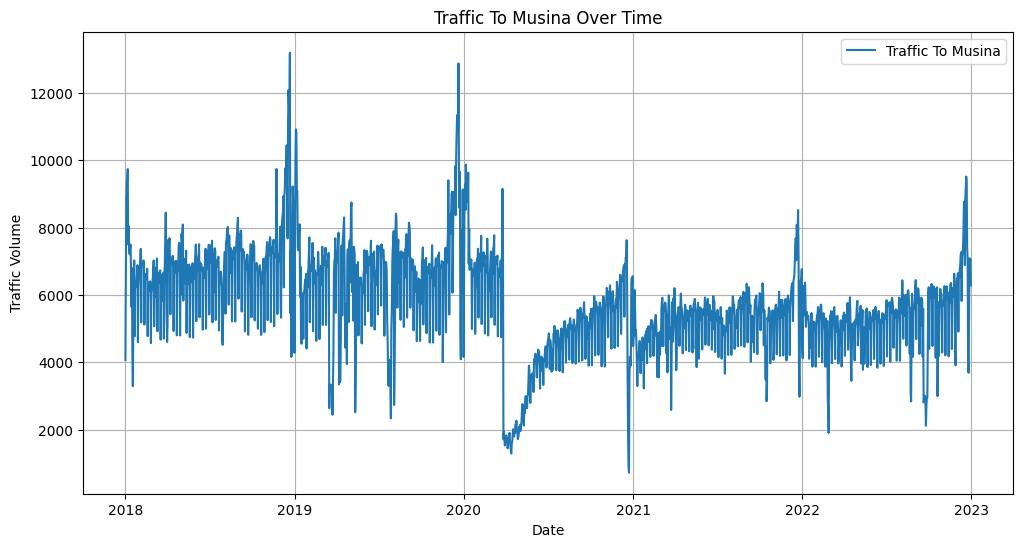

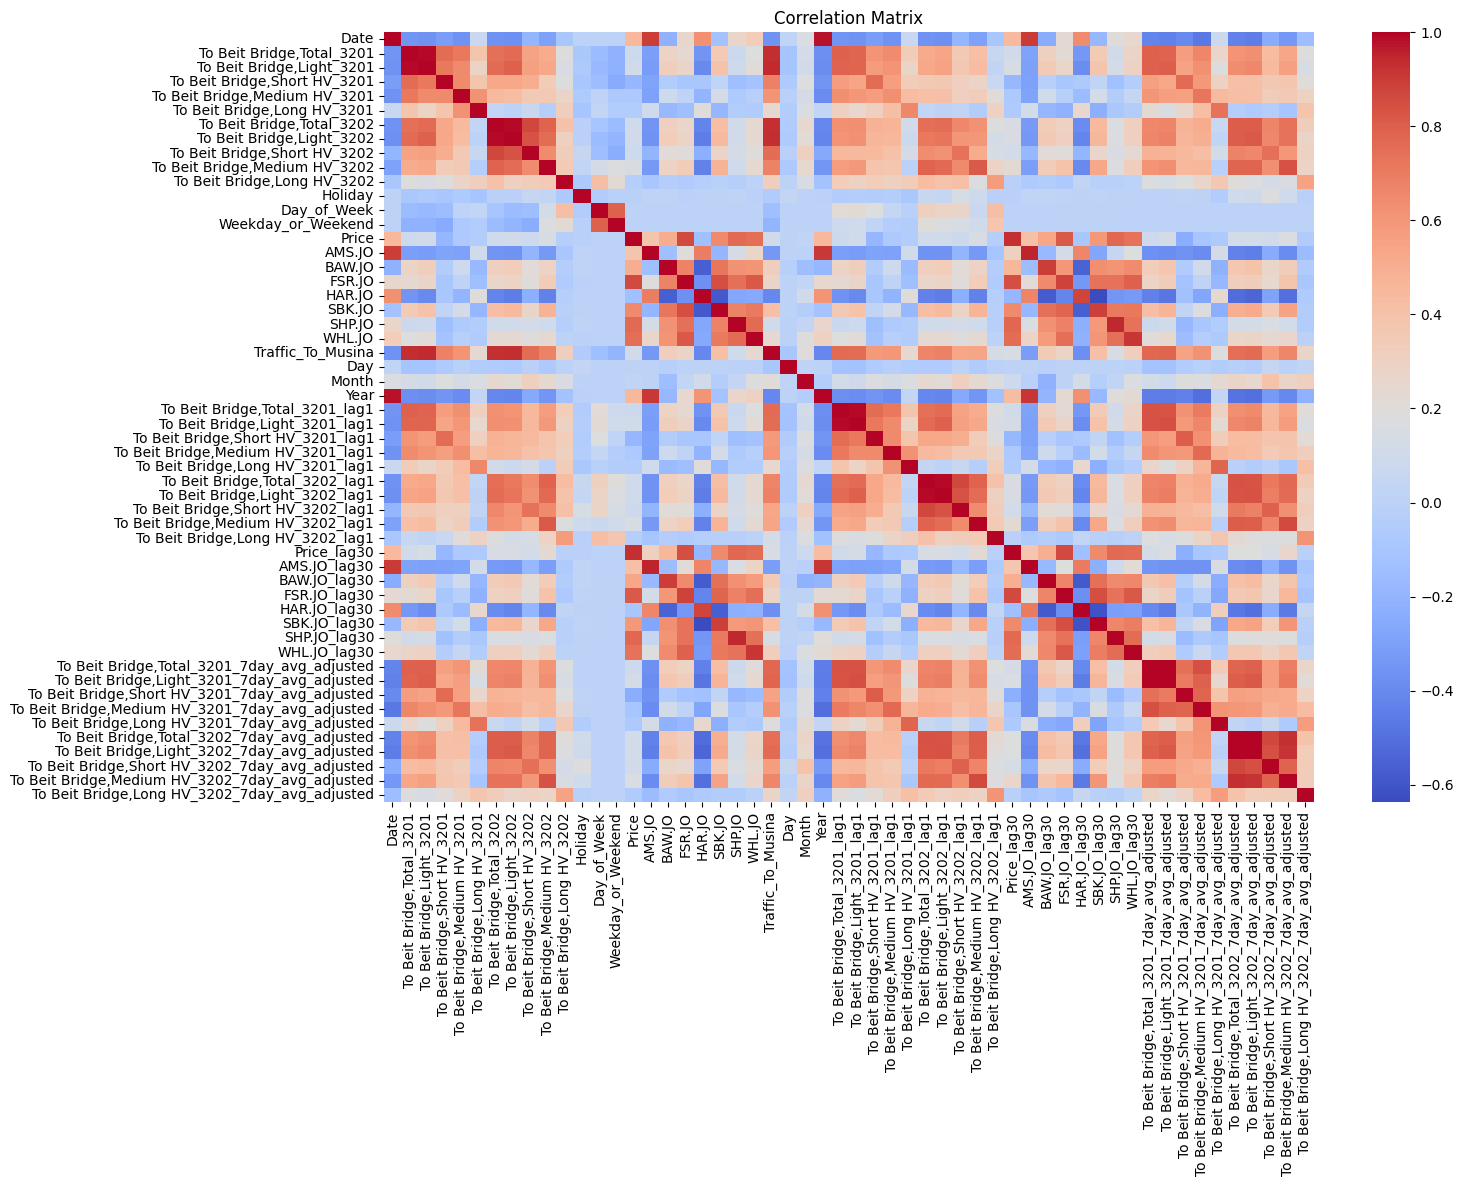

count     1796.000000
mean      5794.877506
std       1506.667990
min        718.000000
25%       4972.000000
50%       5697.500000
75%       6839.750000
max      13198.000000
Name: Traffic_To_Musina, dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for the target variable
target_summary = y.describe()

# Trend analysis: Plotting the target variable over time
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Traffic_To_Musina'], label='Traffic To Musina')
plt.title('Traffic To Musina Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


# Correlation analysis: Correlation heatmap of the features and the target variable
correlation_matrix = data_prepared.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


target_summary


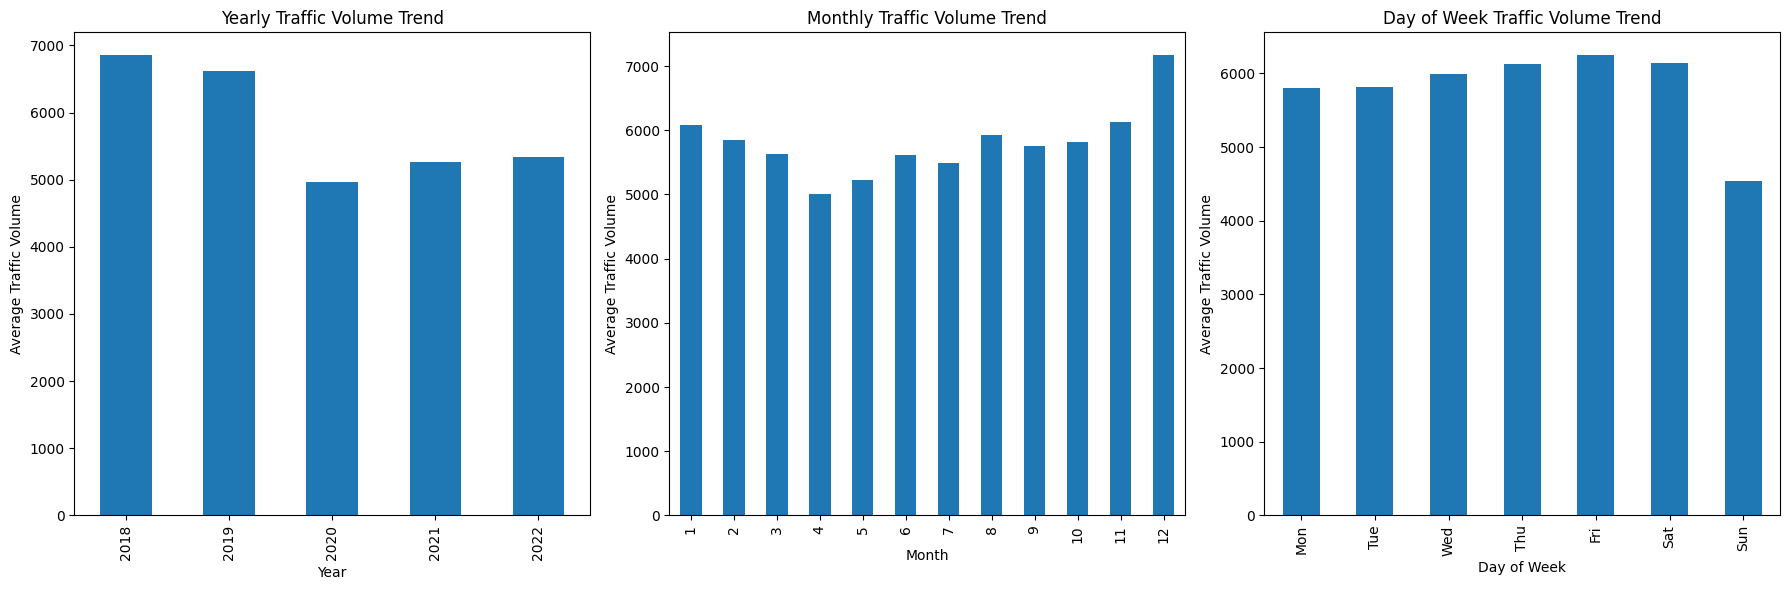

In [7]:
# Seasonal and Cyclical Trend Analysis

# Extracting year and month for trend analysis
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['DayOfWeek'] = data_cleaned['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Yearly trend
yearly_trend = data_cleaned.groupby('Year')['Traffic_To_Musina'].mean()

# Monthly trend
monthly_trend = data_cleaned.groupby('Month')['Traffic_To_Musina'].mean()

# Day of week trend
dayofweek_trend = data_cleaned.groupby('DayOfWeek')['Traffic_To_Musina'].mean()

# Plotting the trends
plt.figure(figsize=(18, 6))

# Yearly trend plot
plt.subplot(1, 3, 1)
yearly_trend.plot(kind='bar')
plt.title('Yearly Traffic Volume Trend')
plt.xlabel('Year')
plt.ylabel('Average Traffic Volume')

# Monthly trend plot
plt.subplot(1, 3, 2)
monthly_trend.plot(kind='bar')
plt.title('Monthly Traffic Volume Trend')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')

# Day of week trend plot
plt.subplot(1, 3, 3)
dayofweek_trend.plot(kind='bar')
plt.title('Day of Week Traffic Volume Trend')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scaling the features
scaler_combined = StandardScaler()
X_combined_scaled = scaler_combined.fit_transform(X_combined)

scaler_historical_averages = StandardScaler()
X_historical_averages_scaled = scaler_historical_averages.fit_transform(X_historical_averages)

# Splitting the data for X_combined
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined_scaled, y, test_size=0.2, random_state=42)

# Splitting the data for X_historical_averages
X_train_hist_avg, X_test_hist_avg, y_train_hist_avg, y_test_hist_avg = train_test_split(
    X_historical_averages_scaled, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf_model_combined = RandomForestRegressor(random_state=42)
rf_model_hist_avg = RandomForestRegressor(random_state=42)

# Train the model on the training set (X_combined)
rf_model_combined.fit(X_train_combined, y_train_combined)

# Train the model on the training set (X_historical_averages)
rf_model_hist_avg.fit(X_train_hist_avg, y_train_hist_avg)

# Predict on the test set (X_combined)
y_pred_combined = rf_model_combined.predict(X_test_combined)

# Predict on the test set (X_historical_averages)
y_pred_hist_avg = rf_model_hist_avg.predict(X_test_hist_avg)

# Evaluation metrics for X_combined
mae_combined = mean_absolute_error(y_test_combined, y_pred_combined)
rmse_combined = mean_squared_error(y_test_combined, y_pred_combined, squared=False)
r2_combined = r2_score(y_test_combined, y_pred_combined)

# Evaluation metrics for X_historical_averages
mae_hist_avg = mean_absolute_error(y_test_hist_avg, y_pred_hist_avg)
rmse_hist_avg = mean_squared_error(y_test_hist_avg, y_pred_hist_avg, squared=False)
r2_hist_avg = r2_score(y_test_hist_avg, y_pred_hist_avg)

(mae_combined, rmse_combined, r2_combined), (mae_hist_avg, rmse_hist_avg, r2_hist_avg)


((464.1903055555556, 658.8448338419888, 0.8141675707250212),
 (594.2608611111111, 807.4182085922938, 0.7209048478556932))

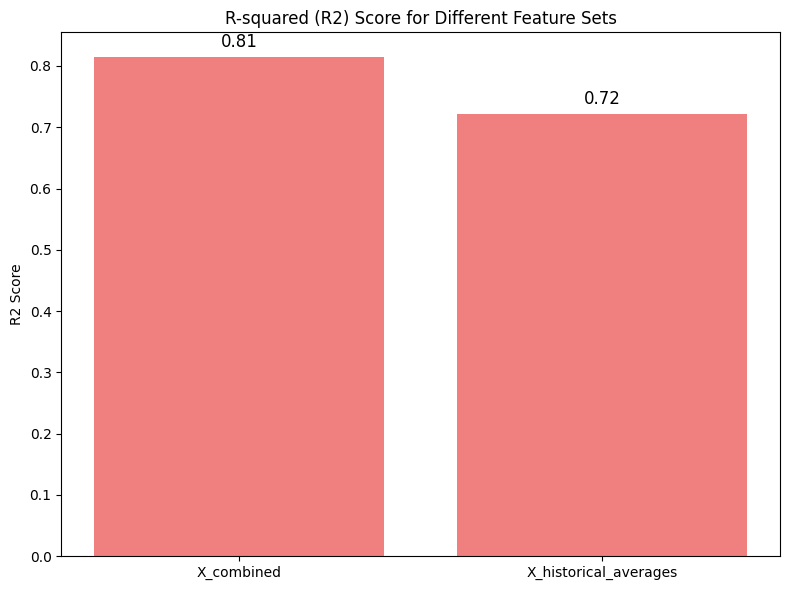

In [9]:
import matplotlib.pyplot as plt

# R2 scores for different feature sets
r2_scores = [r2_combined, r2_hist_avg]
feature_sets = ['X_combined', 'X_historical_averages']

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot R2 scores
ax.bar(feature_sets, r2_scores, color='lightcoral')
ax.set_title('R-squared (R2) Score for Different Feature Sets')
ax.set_ylabel('R2 Score')

# Add data labels on top of each bar
for i, score in enumerate(r2_scores):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


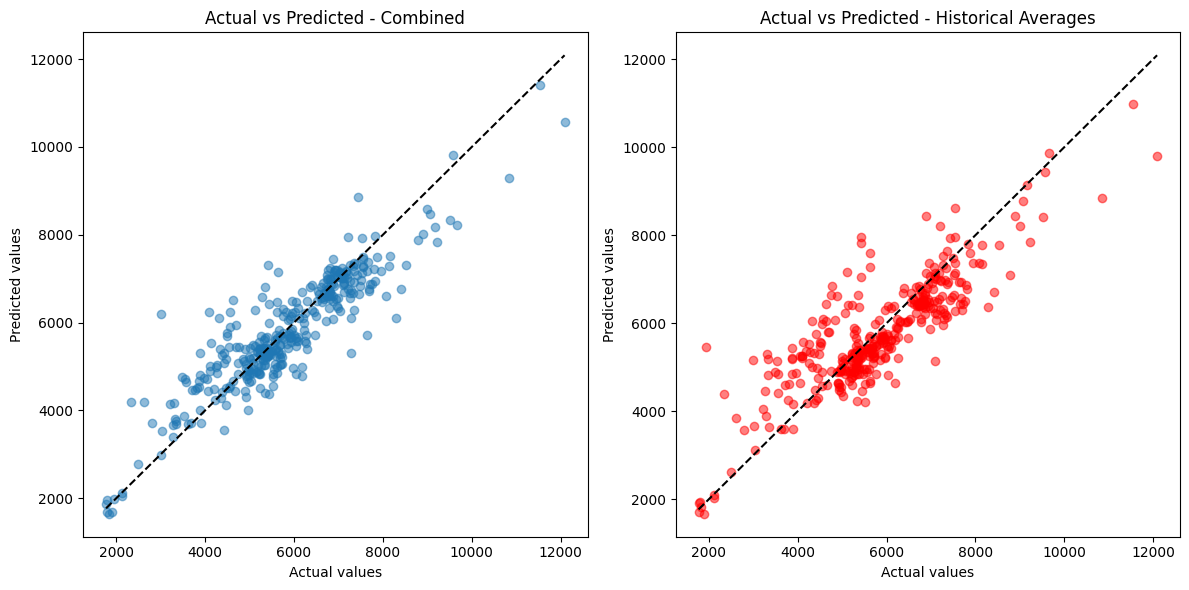

In [10]:
import matplotlib.pyplot as plt

# Assuming y_test_combined, y_pred_combined, y_test_hist_avg, and y_pred_hist_avg are defined as per your code

# Plotting for X_combined
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_combined, y_pred_combined, alpha=0.5)
plt.title('Actual vs Predicted - Combined')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], 'k--') # diagonal line

# Plotting for X_historical_averages
plt.subplot(1, 2, 2)
plt.scatter(y_test_hist_avg, y_pred_hist_avg, alpha=0.5, color='r')
plt.title('Actual vs Predicted - Historical Averages')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([y_test_hist_avg.min(), y_test_hist_avg.max()], [y_test_hist_avg.min(), y_test_hist_avg.max()], 'k--') # diagonal line

plt.tight_layout()
plt.show()


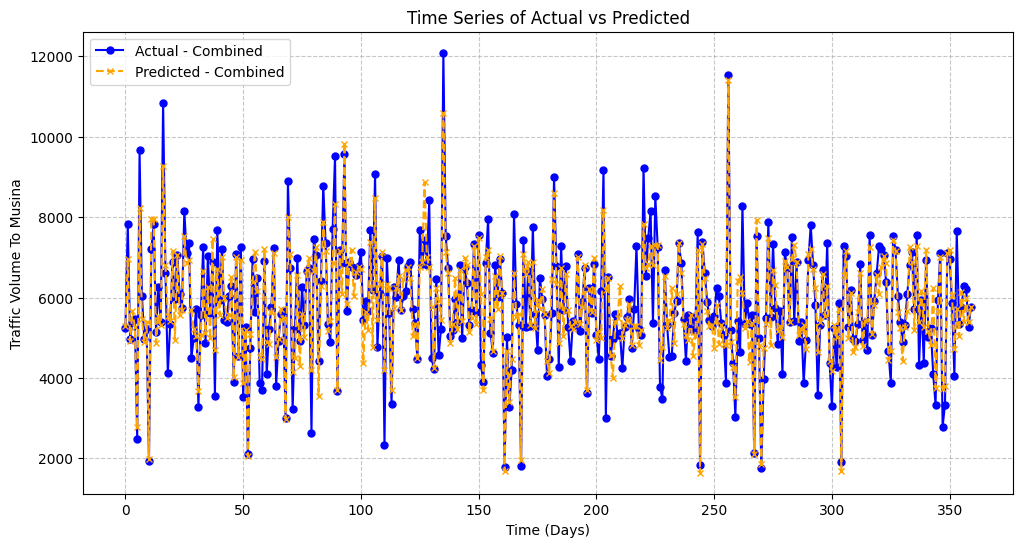

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test_combined, y_pred_combined, and timestamps are defined as per your code

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting for X_combined
plt.plot(timestamps, y_test_combined, label='Actual - Combined', linestyle='-', marker='o', markersize=5, color='blue')
plt.plot(timestamps, y_pred_combined, label='Predicted - Combined', linestyle='--', marker='x', markersize=5, color='orange')

# Set labels and title
plt.title('Time Series of Actual vs Predicted')
plt.xlabel('Time (Day)')
plt.ylabel('Traffic Volume To Musina')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [11]:
# Extracting feature importance for the model trained on X_combined
importance_combined = rf_model_combined.feature_importances_

# Extracting feature importance for the model trained on X_historical_averages
importance_hist_avg = rf_model_hist_avg.feature_importances_

# Creating a DataFrame for feature importance for better visualization
importance_df_combined = pd.DataFrame({
    'Feature': X_combined.columns,
    'Importance': importance_combined
}).sort_values(by='Importance', ascending=False)

importance_df_hist_avg = pd.DataFrame({
    'Feature': X_historical_averages.columns,
    'Importance': importance_hist_avg
}).sort_values(by='Importance', ascending=False)

importance_df_combined.head(10), importance_df_hist_avg.head(10)  # Displaying top 10 features for each model


(                                        Feature  Importance
 0   To Beit Bridge,Total_3201_7day_avg_adjusted    0.373908
 11               To Beit Bridge,Light_3201_lag1    0.131665
 10               To Beit Bridge,Total_3201_lag1    0.059034
 5   To Beit Bridge,Total_3202_7day_avg_adjusted    0.058646
 6   To Beit Bridge,Light_3202_7day_avg_adjusted    0.054374
 12            To Beit Bridge,Short HV_3201_lag1    0.039426
 1   To Beit Bridge,Light_3201_7day_avg_adjusted    0.035052
 18           To Beit Bridge,Medium HV_3202_lag1    0.034792
 16               To Beit Bridge,Light_3202_lag1    0.026431
 15               To Beit Bridge,Total_3202_lag1    0.025576,
                                            Feature  Importance
 0      To Beit Bridge,Total_3201_7day_avg_adjusted    0.467626
 6      To Beit Bridge,Light_3202_7day_avg_adjusted    0.119761
 1      To Beit Bridge,Light_3201_7day_avg_adjusted    0.092844
 5      To Beit Bridge,Total_3202_7day_avg_adjusted    0.086180
 2   To 

C:\Users\shume\AppData\Local\Temp\ipykernel_20096\4090731000.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_combined, y='Feature', x='Importance', palette=palette)


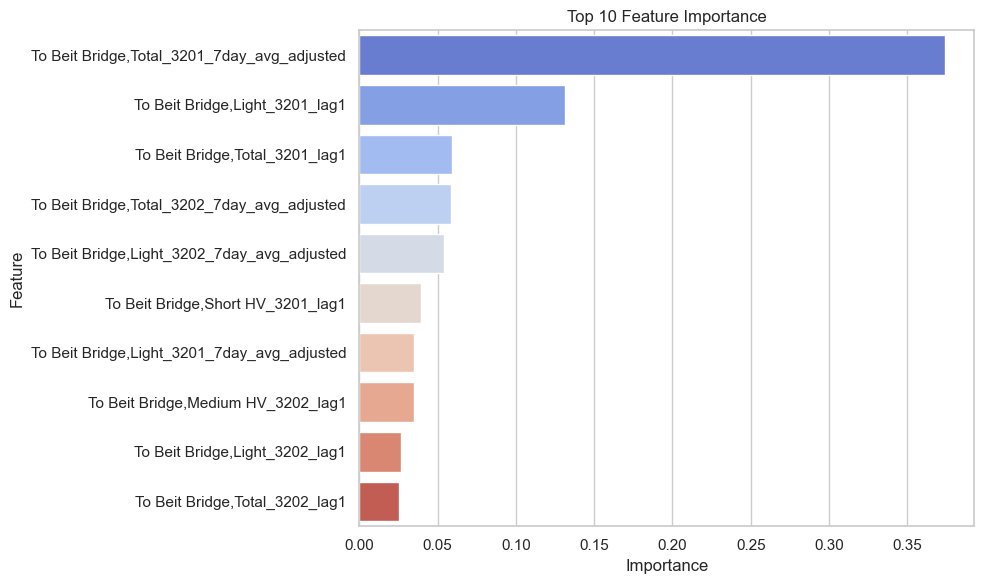

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 features and their importance for 'X_combined'
top_10_combined = importance_df_combined.head(10)

# Create a figure
plt.figure(figsize=(10, 6))

# Set a color palette for better visualization
palette = sns.color_palette("coolwarm", len(top_10_combined))

# Plot feature importance for 'X_combined'
sns.barplot(data=top_10_combined, y='Feature', x='Importance', palette=palette)
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')

# Show the plot
plt.tight_layout()
plt.show()


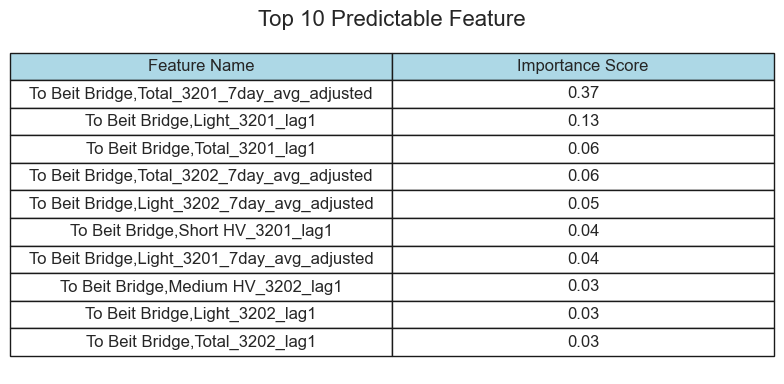

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 features and their importance for 'X_combined'
top_10_combined = importance_df_combined.head(10)

# Create a table using pandas DataFrame with importance scores rounded to 2 decimal places
table_data = top_10_combined[['Feature', 'Importance']].copy()
table_data['Importance'] = table_data['Importance'].round(2)
table_data.rename(columns={'Feature': 'Feature Name', 'Importance': 'Importance Score'}, inplace=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Hide the axis
ax.axis('off')

# Create a table
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Change the color of the first row to light blue
table.get_celld()[(0, 0)].set_facecolor('#add8e6')
table.get_celld()[(0, 1)].set_facecolor('#add8e6')

plt.title('Top 10 Predictable Feature', fontsize=16)

# Show the table
plt.tight_layout()
plt.show()


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Initialize the models
dt_model_combined = DecisionTreeRegressor(random_state=42)
dt_model_hist_avg = DecisionTreeRegressor(random_state=42)

lr_model_combined = LinearRegression()
lr_model_hist_avg = LinearRegression()

# Train the Decision Tree model on the training set (X_combined)
dt_model_combined.fit(X_train_combined, y_train_combined)

# Train the Decision Tree model on the training set (X_historical_averages)
dt_model_hist_avg.fit(X_train_hist_avg, y_train_hist_avg)

# Train the Linear Regression model on the training set (X_combined)
lr_model_combined.fit(X_train_combined, y_train_combined)

# Train the Linear Regression model on the training set (X_historical_averages)
lr_model_hist_avg.fit(X_train_hist_avg, y_train_hist_avg)

# Predict on the test set (Decision Tree with X_combined)
y_pred_dt_combined = dt_model_combined.predict(X_test_combined)

# Predict on the test set (Decision Tree with X_historical_averages)
y_pred_dt_hist_avg = dt_model_hist_avg.predict(X_test_hist_avg)

# Predict on the test set (Linear Regression with X_combined)
y_pred_lr_combined = lr_model_combined.predict(X_test_combined)

# Predict on the test set (Linear Regression with X_historical_averages)
y_pred_lr_hist_avg = lr_model_hist_avg.predict(X_test_hist_avg)

# Evaluation metrics for Decision Tree with X_combined
mae_dt_combined = mean_absolute_error(y_test_combined, y_pred_dt_combined)
rmse_dt_combined = mean_squared_error(y_test_combined, y_pred_dt_combined, squared=False)
r2_dt_combined = r2_score(y_test_combined, y_pred_dt_combined)

# Evaluation metrics for Decision Tree with X_historical_averages
mae_dt_hist_avg = mean_absolute_error(y_test_hist_avg, y_pred_dt_hist_avg)
rmse_dt_hist_avg = mean_squared_error(y_test_hist_avg, y_pred_dt_hist_avg, squared=False)
r2_dt_hist_avg = r2_score(y_test_hist_avg, y_pred_dt_hist_avg)

# Evaluation metrics for Linear Regression with X_combined
mae_lr_combined = mean_absolute_error(y_test_combined, y_pred_lr_combined)
rmse_lr_combined = mean_squared_error(y_test_combined, y_pred_lr_combined, squared=False)
r2_lr_combined = r2_score(y_test_combined, y_pred_lr_combined)

# Evaluation metrics for Linear Regression with X_historical_averages
mae_lr_hist_avg = mean_absolute_error(y_test_hist_avg, y_pred_lr_hist_avg)
rmse_lr_hist_avg = mean_squared_error(y_test_hist_avg, y_pred_lr_hist_avg, squared=False)
r2_lr_hist_avg = r2_score(y_test_hist_avg, y_pred_lr_hist_avg)

((mae_dt_combined, rmse_dt_combined, r2_dt_combined), (mae_dt_hist_avg, rmse_dt_hist_avg, r2_dt_hist_avg),
 (mae_lr_combined, rmse_lr_combined, r2_lr_combined), (mae_lr_hist_avg, rmse_lr_hist_avg, r2_lr_hist_avg))


((616.2972222222222, 991.9779581444561, 0.5787312356835022),
 (803.975, 1201.6478188535755, 0.38182758785788884),
 (531.9768927941082, 729.4325263787039, 0.7722148200462926),
 (622.1311387699922, 873.3830153120359, 0.673438713483306))

In [14]:
# Creating a dataframe to organize the results
results = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'Decision Tree', 'Decision Tree', 'Linear Regression', 'Linear Regression'],
    'Feature Set': ['X_combined', 'X_historical_averages','X_combined', 'X_historical_averages', 'X_combined', 'X_historical_averages'],
    'MAE': [mae_combined, mae_hist_avg, mae_dt_combined, mae_dt_hist_avg, mae_lr_combined, mae_lr_hist_avg],
    'RMSE': [rmse_combined, rmse_hist_avg, rmse_dt_combined, rmse_dt_hist_avg, rmse_lr_combined, rmse_lr_hist_avg],
    'R2': [r2_combined, r2_hist_avg, r2_dt_combined, r2_dt_hist_avg, r2_lr_combined, r2_lr_hist_avg]
})

results.set_index(['Model', 'Feature Set'], inplace=True)
results.sort_values(by='MAE', inplace=True)
results


,,MAE,RMSE,R2
Model,Feature Set,,,
Random Forest,X_combined,464.190306,658.844834,0.814168
Linear Regression,X_combined,531.976893,729.432526,0.772215
Random Forest,X_historical_averages,594.260861,807.418209,0.720905
Decision Tree,X_combined,616.297222,991.977958,0.578731
Linear Regression,X_historical_averages,622.131139,873.383015,0.673439
Decision Tree,X_historical_averages,803.975000,1201.647819,0.381828


C:\Users\shume\AppData\Local\Temp\ipykernel_20096\354809836.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.barplot(data=results.reset_index(), x='Model', y='R2', hue='Feature Set', palette=palette)


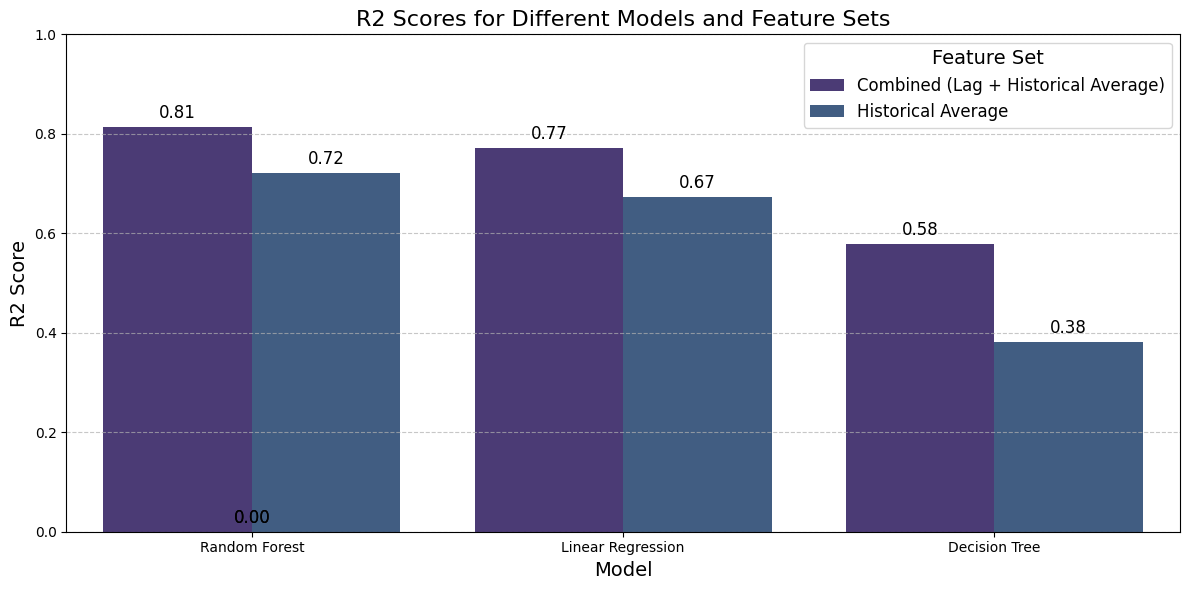

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a more informative barplot using Seaborn
plt.figure(figsize=(12, 6))
palette = sns.color_palette("viridis", len(results))  # Custom color palette

# Create the barplot
ax = sns.barplot(data=results.reset_index(), x='Model', y='R2', hue='Feature Set', palette=palette)

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('R2 Scores for Different Models and Feature Sets', fontsize=16)  # Increase title font size
plt.xlabel('Model', fontsize=14)  # Increase x-axis label font size
plt.ylabel('R2 Score', fontsize=14)  # Increase y-axis label font size

# Customize legend labels
legend = plt.legend(title='Feature Set', fontsize=12)  # Increase legend font size
legend.set_title('Feature Set', prop={'size': 14})  # Change legend title font size
legend.get_texts()[0].set_text('Combined (Lag + Historical Average)')  # Change the first legend label
legend.get_texts()[1].set_text('Historical Average')   # Change the second legend label


plt.ylim(0, 1)  # Set y-axis limits to ensure a consistent scale
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

# Show the plot
plt.tight_layout()
plt.show()
